### Open the csv file containg the offense and the embeddings for that offense

In [1]:
# imports
import numpy as np
import pandas as pd

# load data
datafile_path = "police_with_embeddings.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to numpy array

matrix = np.vstack(df.embedding.values)
matrix.shape

(3132, 1536)

### Create **X** number Of clusters for data to be split into (Using 4 for this example)

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
#print(kmeans)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster")#.mean().sort_values()
df

### using the embedded data we are able to convert them into x and y cordinates

The sklearn is a ML python learning library that is able to cluster based off the embeddings.

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

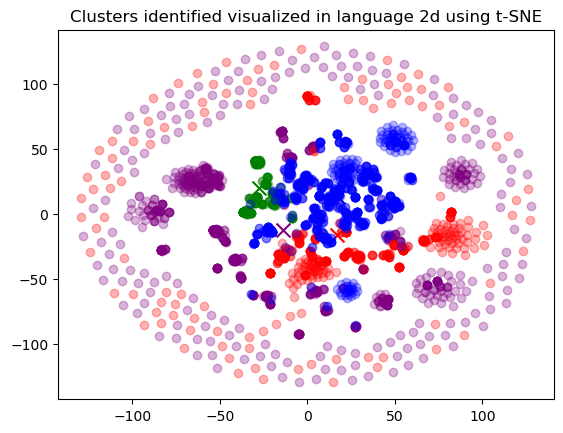

In [3]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized")

#### We convert each of the offenses into an X / Y and get the graph above.

What this graph shows
* the surrounding outliers
* the 4 groups by color
* Good clustering of Green
* 1-2 unique subsets of Blue
* Purple has many islands or could be split into more uniqe subgroups

### Finally, I As AI to analyize each oif the 4 clusters and create a theme.

And also show 5 exaples of the offenses under that theme.

In [15]:
import openai

openai.api_key = "sk-OUrLCxcGxxxxxxxxxxxxxxxxxxx1xlqizB6PDP4dXEz"

# Reading a review which belong to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    offense = df[df.Cluster == i].sample(rev_per_cluster, random_state=42).values
    
    
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following police offences have in common?\n\nCustomer reviews:\n"""\n{offense}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        #print(sample_cluster_rows.Score.values[j], end=", ")
        #print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.offense.str[:70].values[j])

    print("-" * 100)

Cluster 0 Theme:  All of the police offences involve some form of investigation or enforcement.
9497 Aided Case
9999 9999 - (Misc. Incident): 
9490 Missing Persons (18 and Over) / 9498 302 (Mental)
9999 9999 - (Misc. Incident): 
9501 Bench Warrant
----------------------------------------------------------------------------------------------------
Cluster 1 Theme:  All of the offences involve some form of accident or damage to property.
3742 Accidents Involving Death or Personal Injury
3743 Accidents Involving Damage to Attended Veh. or Property
3745 Accidents Involving Damage to Unattended Veh.or Prop.
3743 Accidents Involving Damage to Attended Veh. or Property / 3744 Du
3745 Accidents Involving Damage to Unattended Veh.or Prop.
----------------------------------------------------------------------------------------------------
Cluster 2 Theme:  All of the police offences listed involve the taking of property without permission.
3701 Robbery.
3934 Theft from Vehicle
3929(a)(1) Retail 